<a href="https://colab.research.google.com/github/milnico/masterAI4HU/blob/main/KERAS_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the iris dataset from sklearn
wine = load_wine()

# Convert the iris dataset to a pandas dataframe
df = pd.DataFrame(wine.data, columns=wine.feature_names)
print(df)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [ ]:
from keras.src.engine.input_layer import Input
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_wine
from tensorflow.keras.datasets import mnist
import tensorflow.keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras.utils import plot_model

def create_custom_model(input_dim, output_dim, nodes, layers=1, name='model'):
    # Create model
    model = Sequential(name=name)
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(nodes, activation='tanh'))
    model.add(Dense(output_dim, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

wine = load_wine()
features = wine['data']
target = wine['target']
names = wine['target_names']
feature_names = wine['feature_names']
enc = OneHotEncoder()
target = enc.fit_transform(target[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1
# which is importance for convergence of the neural network
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=2)

n_features = features.shape[1]
n_classes = target.shape[1]



n_layers = 1  # must be greater than 0
n_hidden_neurons = 8
model = create_custom_model(n_features, n_classes, n_hidden_neurons, n_layers)

model.summary()

from keras.callbacks import TensorBoard

history = model.fit(X_train, Y_train,
                              batch_size=32,
                              epochs=200,
                              verbose=1,
                              validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 8)                 112       
                                                                 
 dense_19 (Dense)            (None, 3)                 27        
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
5/5 [==============================] - 1s 76ms/step - loss: 0.9970 - accuracy: 0.4789 - val_loss: 1.0060 - val_accuracy: 0.3611
Epoch 2/200
5/5 [==============================] - 0s 13ms/step - loss: 0.9626 - accuracy: 0.5000 - val_loss: 0.9718 - val_accuracy: 0.4722
Epoch 3/200
5/5 [==============================] - 0s 13ms/step - loss: 0.9295 - accuracy: 0.5352 - val_loss: 0.9388 - val_accuracy: 0.5000

KeyboardInterrupt: ignored

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 8)                 112       
                                                                 
 dense_17 (Dense)            (None, 3)                 27        
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


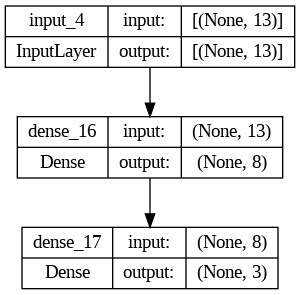

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_wine
import tensorflow.keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras.utils import plot_model

def create_custom_model(input_dim, output_dim, nodes, layers=1, name='model'):
    # Create model
    model = Sequential(name=name)
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(nodes, activation='tanh'))
    model.add(Dense(output_dim, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

wine = load_wine()
features = wine['data']
target = wine['target']
names = wine['target_names']
feature_names = wine['feature_names']
enc = OneHotEncoder()

target = enc.fit_transform(target[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1
# which is importance for convergence of the neural network
scaler = StandardScaler()
feataures_scaled = scaler.fit_transform(features)
# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=2)

n_features = features.shape[1]
n_classes = target.shape[1]



n_layers = 3 # must be greater than 0
n_hidden_neurons = 8
model = create_custom_model(n_features, n_classes, n_hidden_neurons, n_layers)

model.summary()
# Plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='mode2l.png')
from IPython.display import Image
Image(retina=True, filename='mode2l.png')